In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler

In [5]:
telecom=pd.read_csv(r"telecom.csv")

In [6]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
telecom.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,Male,...,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [8]:
telecom.describe(include='all')

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,NaN,2,3,2,4,NaN,6531,2,2,...,2,2,3,3,3,3,3,3,3,3
top,7590-VHVEG,NaN,Yes,Month-to-month,Yes,Electronic check,NaN,,No,Male,...,No,No,No,Fiber optic,No,No,No,No,No,No
freq,1,NaN,6361,3875,4171,2365,NaN,11,5174,3555,...,3641,4933,3391,3096,3498,3088,3095,3473,2810,2785
mean,NaN,32.371149,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,24.559481,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
telecom.shape

(7043, 21)

In [10]:
list=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def binary(x):
    return x.map({'Yes':1,"NO":0})
telecom[list]=telecom[list].apply(binary)

<Axes: >

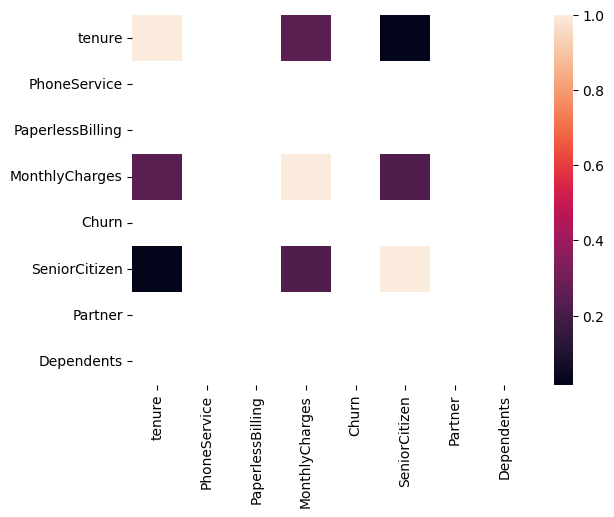

In [11]:
telecom.corr()
sns.heatmap(data=telecom.corr())

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
telecom['gender']=le.fit_transform(telecom['gender'])
telecom['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [13]:
d1=pd.get_dummies(telecom[['Contract','PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']])
d1

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
7039,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
7040,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7041,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [14]:
telecom=pd.concat([telecom,d1],axis=1)
telecom.head(n=5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,NaN,Month-to-month,1.0,Electronic check,29.85,29.85,NaN,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1.0,One year,NaN,Mailed check,56.95,1889.5,NaN,1,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,NaN,One year,NaN,Bank transfer (automatic),42.30,1840.75,NaN,1,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
m1=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
m11=m1.drop(['OnlineSecurity_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

In [16]:
m2=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
m12=m2.drop(['OnlineBackup_No internet service'],1)
telecom=pd.concat([telecom,m12],axis=1)

In [17]:
m3=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
m13=m3.drop(['DeviceProtection_No internet service'],1)
telecom=pd.concat([telecom,m13],axis=1)
m4=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
m14=m4.drop(['TechSupport_No internet service'],1)
telecom=pd.concat([telecom,m14],axis=1)
m5=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
m15=m5.drop(['StreamingTV_No internet service'],1)
telecom=pd.concat([telecom,m15],axis=1)
m6=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
m16=m6.drop(['StreamingMovies_No internet service'],1)
telecom=pd.concat([telecom,m16],axis=1)
m7=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
m17=m7.drop(['MultipleLines_No phone service'],1)
telecom=pd.concat([telecom,m17],axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,NaN,Month-to-month,1.0,Electronic check,29.85,29.85,NaN,0,...,1,0,1,0,1,0,1,0,0,0
1,5575-GNVDE,34,1.0,One year,NaN,Mailed check,56.95,1889.5,NaN,1,...,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,2,1.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,1,...,1,0,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,NaN,One year,NaN,Bank transfer (automatic),42.30,1840.75,NaN,1,...,0,1,0,1,1,0,1,0,0,0
4,9237-HQITU,2,1.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,0,...,1,0,1,0,1,0,1,0,1,0


In [19]:
t1=telecom.drop(['Contract','PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)

In [20]:
t1['TotalCharges']=pd.to_numeric(t1.TotalCharges,errors='coerce')
t1['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [21]:
t2=t1[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
t2.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [22]:
t1.isnull().sum()

customerID                                    0
tenure                                        0
PhoneService                                682
PaperlessBilling                           2872
MonthlyCharges                                0
TotalCharges                                 11
Churn                                      5174
gender                                        0
SeniorCitizen                                 0
Partner                                    3641
Dependents                                 4933
Contract_Month-to-month                       0
Contract_One year                             0
Contract_Two year                             0
PaymentMethod_Bank transfer (automatic)       0
PaymentMethod_Credit card (automatic)         0
PaymentMethod_Electronic check                0
PaymentMethod_Mailed check                    0
MultipleLines_No                              0
MultipleLines_No phone service                0
MultipleLines_Yes                       

In [23]:
t1['Churn']=t1['Churn'].fillna(0)
t1['Churn']

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [24]:
t1=t1[~np.isnan(t1['PhoneService'])]
t1=t1[~np.isnan(t1['Partner'])]
t1=t1[~np.isnan(t1['PaperlessBilling'])]
t1=t1[~np.isnan(t1['Dependents'])]
t1=t1[~np.isnan(t1['TotalCharges'])]

In [25]:
x=t1.drop(['Churn','customerID'],axis=1)
y=t1['Churn']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)
X_train[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_Month-to-month,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
2246,-1.761003,1.0,1.0,0.974827,-1.271069,0,0,1.0,1.0,1,...,0,1,1,0,0,1,0,1,0,1
2346,1.182594,1.0,1.0,0.752919,1.382296,0,0,1.0,1.0,0,...,0,1,1,0,1,0,0,1,0,1
149,-1.172284,1.0,1.0,-0.116496,-0.890011,1,0,1.0,1.0,1,...,0,1,0,1,1,0,0,1,1,0
5581,1.056440,1.0,1.0,1.329217,1.778161,1,0,1.0,1.0,0,...,0,1,0,1,0,1,0,1,0,1
5570,-0.247153,1.0,1.0,0.733046,0.078000,0,0,1.0,1.0,1,...,0,1,1,0,1,0,0,1,0,1


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [27]:
model1=SVC(kernel='linear')
model1.fit(X_train,Y_train)

SVC(kernel='linear')

In [28]:
classifier = Sequential()
classifier.add(Dense(units=200,kernel_initializer='he_uniform',activation='tanh',input_dim=54))
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='tanh'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:


# callbacks = [
#              EarlyStopping(monitor='val_accuracy', patience=30, verbose=2),
#              ModelCheckpoint('checkpoints/multi_layer_best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
#             ]

In [30]:
batch_size = 100
n_epochs = 100

In [31]:
classifier.fit(X_train.values, Y_train, batch_size=100, epochs=n_epochs, validation_split=0.2,
             verbose=2,
              validation_data=(X_test.values, Y_test))

Epoch 1/100
6/6 - 1s - loss: 0.6067 - accuracy: 0.6865 - val_loss: 0.4781 - val_accuracy: 0.8374 - 1s/epoch - 218ms/step
Epoch 2/100
6/6 - 0s - loss: 0.4299 - accuracy: 0.8004 - val_loss: 0.4461 - val_accuracy: 0.8496 - 58ms/epoch - 10ms/step
Epoch 3/100
6/6 - 0s - loss: 0.4077 - accuracy: 0.8214 - val_loss: 0.4381 - val_accuracy: 0.8496 - 57ms/epoch - 9ms/step
Epoch 4/100
6/6 - 0s - loss: 0.3888 - accuracy: 0.8336 - val_loss: 0.4454 - val_accuracy: 0.8496 - 61ms/epoch - 10ms/step
Epoch 5/100
6/6 - 0s - loss: 0.3838 - accuracy: 0.8319 - val_loss: 0.4507 - val_accuracy: 0.8496 - 51ms/epoch - 8ms/step
Epoch 6/100
6/6 - 0s - loss: 0.3727 - accuracy: 0.8354 - val_loss: 0.4571 - val_accuracy: 0.8496 - 65ms/epoch - 11ms/step
Epoch 7/100
6/6 - 0s - loss: 0.3689 - accuracy: 0.8301 - val_loss: 0.4471 - val_accuracy: 0.8496 - 71ms/epoch - 12ms/step
Epoch 8/100
6/6 - 0s - loss: 0.3641 - accuracy: 0.8371 - val_loss: 0.4532 - val_accuracy: 0.8496 - 66ms/epoch - 11ms/step
Epoch 9/100
6/6 - 0s - loss

In [ ]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               11000     
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 31201 (121.88 KB)
Trainable params: 31201 (121.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# best_model = classifier
# best_model.load_weights('checkpoints/multi_layer_best_model.h5')
# best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Evaluate on test set
# score = best_model.evaluate(X_test.values, Y_test, verbose=0)
# print('Test accuracy: %.2f%%' % (score[1]*100))



ValueError: ignored

In [ ]:
y_pred_ann=classifier.predict(X_test)
y_pred_ann

8/8 [==============================] - 0s 4ms/step


array([[7.3599812e-19],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [6.7280257e-35],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.6277475e-27],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0269126e-32],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.2617016e-20],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.8510804e-28],
       [0.0000000e+00],
       [0.000000

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,recall_score,f1_score,mean_squared_error,mean_absolute_error
# a=accuracy_score(Y_test,y_pred_ann)
# print("Accuracy score:",a*100)
# b=precision_score(Y_test,y_pred_ann)
# print("Precison score:",b*100)
# c=recall_score(Y_test,y_pred_ann)
# print("recall score:",c*100)
# d=f1_score(Y_test,y_pred_ann)
# print("F1 score:",d*100)
e=mean_squared_error(Y_test,y_pred_ann)
print("Mean squared error for this model is:",e)
f=mean_absolute_error(Y_test,y_pred_ann)
print("Mean absolute error is:",f)

Mean squared error for this model is: 0.16260144178731237
Mean absolute error is: 0.16260173398667396


In [ ]:
ypred=rf.predict(X_test)
ypred
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,recall_score,f1_score,mean_squared_error,mean_absolute_error
a=accuracy_score(Y_test,ypred)
print("Accuracy score:",a*100)
b=precision_score(Y_test,ypred)
print("Precison score:",b*100)
c=recall_score(Y_test,ypred)
print("recall score:",c*100)
d=f1_score(Y_test,ypred)
print("F1 score:",d*100)
e=mean_squared_error(Y_test,ypred)
print("Mean squared error for this model is:",e)
f=mean_absolute_error(Y_test,ypred)
print("Mean absolute error is:",f)

Accuracy score: 82.92682926829268
Precison score: 37.5
recall score: 7.5
F1 score: 12.499999999999998
Mean squared error for this model is: 0.17073170731707318
Mean absolute error is: 0.17073170731707318


In [ ]:
ypred1=model1.predict(X_test)
ypred1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
a1=accuracy_score(Y_test,ypred)
print("Accuracy score:",a1*100)
b1=precision_score(Y_test,ypred)
print("Precison score:",b1*100)

Accuracy score: 82.92682926829268
Precison score: 37.5


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=4)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
ypred2=model2.predict(X_test)
ypred2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
a3=accuracy_score(Y_test,ypred2)
print("Accuracy score:",a3*100)
b3=precision_score(Y_test,ypred2)
print("Precison score:",b3*100)

Accuracy score: 83.73983739837398
Precison score: 0.0


In [ ]:
alg=['Random_Forest','Support_Vector_Classifier','Decision_Tree','ANN']
Accuracy_scores=[82.92682926829268,84.53333333333334,82.92682926829268,0.9755000000000*100]
data=pd.DataFrame((zip(alg,Accuracy_scores)),columns=['alg','Accuracy_scores'])
data

,alg,Accuracy_scores
0,Random_Forest,82.926829
1,Support_Vector_Classifier,84.533333
2,Decision_Tree,82.926829
3,ANN,97.550000


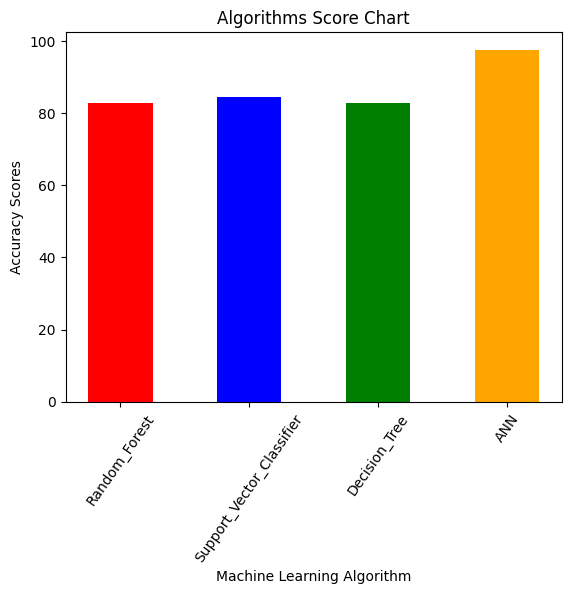

In [ ]:
c=['r','b','g','orange']
plt.bar(alg,Accuracy_scores,width=0.5,color=c)
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy Scores')
plt.title('Algorithms Score Chart')
plt.xticks(rotation=55)
plt.show()

In [ ]:
# Determine baseline predictions
# Predict the mean quality of the training data for each validation input

print('MSE:', np.mean((Y_test - ([Y_train.mean()] * Y_test.shape[0])) ** 2))

MSE: 0.13842390962700762


In [34]:
alg=['Random_Forest','Support_Vector_Classifier','Decision_Tree','ANN']
ms=[0.17479674796747968,0.16260162601626016,0.17260162601626016,0.16260144178731237]
data=pd.DataFrame((zip(alg,ms)),columns=['Algorithm','Mean Squared Error'])
data

,Algorithm,Mean Squared Error
0,Random_Forest,0.174797
1,Support_Vector_Classifier,0.162602
2,Decision_Tree,0.172602
3,ANN,0.162601


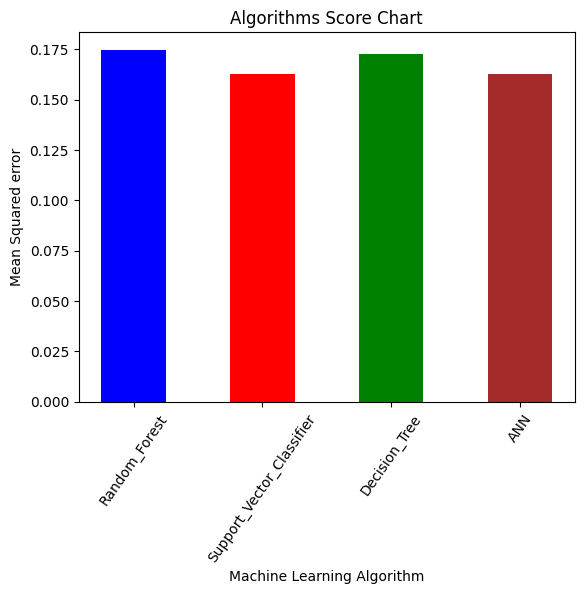

In [39]:
c=['b','r','g','brown']
plt.bar(alg,ms,width=0.5,color=c)
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Squared error')
plt.title('Algorithms Score Chart')
plt.xticks(rotation=55)
plt.show()

In [38]:
alg=['Random_Forest','Support_Vector_Classifier','Decision_Tree','ANN']
ma=[0.17479674796747968,0.16260162601626016,0.17260162601626016,0.16260173398667396]
data=pd.DataFrame((zip(alg,ma)),columns=['Algorithms','Mean Absolute Error'])
data

,Algorithms,Mean Absolute Error
0,Random_Forest,0.174797
1,Support_Vector_Classifier,0.162602
2,Decision_Tree,0.172602
3,ANN,0.162602


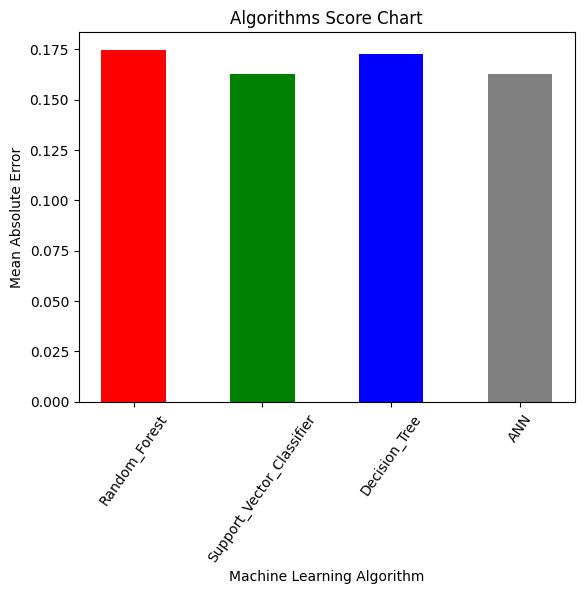

In [40]:
c=['r','g','b',"grey"]
plt.bar(alg,ma,width=0.5,color=c)
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Absolute Error')
plt.title('Algorithms Score Chart')
plt.xticks(rotation=55)
plt.show()